**Import usefull libraries**

In [4]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import median
from statistics import mode

import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [5]:
df = pd.read_csv('data/bitcoin.csv', index_col='time')
print(df.shape)
df.head()

(193, 9)


,low,high,open,close,volume,greed_and_fear,difficulty,sentiment_medio,google_trend
time,,,,,,,,,
2022-12-20,16398.22,17060.86,16439.98,16897.65,34330.282352,29.0,3.536407e+13,0.084011,23
2022-12-19,16273.40,16822.84,16742.33,16439.74,26856.085987,29.0,3.460660e+13,0.068184,22
2022-12-18,16663.76,16875.00,16782.23,16741.16,11073.438862,26.0,3.424433e+13,0.101187,19
2022-12-17,16585.64,16799.99,16634.29,16782.25,18446.683602,28.0,3.424433e+13,0.053202,21
2022-12-16,16529.53,17525.00,17359.10,16632.64,47159.863007,29.0,3.424433e+13,0.072307,27


**descriptive analysis**

In [6]:
null = df.isnull().sum()
duplicate = df.duplicated().sum()
print(null)
print(r'valori doppi: ', duplicate)

low                0
high               0
open               0
close              0
volume             0
greed_and_fear     0
difficulty         0
sentiment_medio    0
google_trend       0
dtype: int64
valori doppi:  0


In [7]:
df.dtypes

low                float64
high               float64
open               float64
close              float64
volume             float64
greed_and_fear     float64
difficulty         float64
sentiment_medio    float64
google_trend         int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
low,193.0,1.956226e+04,2.243539e+03,1.546000e+04,1.835863e+04,1.954014e+04,2.078239e+04,2.808001e+04
high,193.0,2.050376e+04,2.456727e+03,1.627999e+04,1.931140e+04,2.041091e+04,2.181515e+04,2.941111e+04
open,193.0,2.007107e+04,2.370360e+03,1.575896e+04,1.904366e+04,2.003530e+04,2.136661e+04,2.905879e+04
close,193.0,2.000818e+04,2.290261e+03,1.576014e+04,1.894889e+04,2.000473e+04,2.131341e+04,2.838863e+04
volume,193.0,2.658647e+04,1.541140e+04,7.044990e+03,1.696111e+04,2.383006e+04,3.343636e+04,1.196340e+05
greed_and_fear,193.0,2.455959e+01,7.875848e+00,6.000000e+00,2.000000e+01,2.400000e+01,2.900000e+01,4.700000e+01
difficulty,193.0,3.208167e+13,3.349055e+12,2.769257e+13,2.915280e+13,3.136055e+13,3.561079e+13,3.695049e+13
sentiment_medio,193.0,7.751483e-02,3.159387e-02,-2.216693e-04,5.735665e-02,7.138735e-02,9.537653e-02,1.991396e-01
google_trend,193.0,3.102073e+01,1.447950e+01,1.800000e+01,2.300000e+01,2.700000e+01,3.300000e+01,1.000000e+02


In [9]:
df.corr()

,low,high,open,close,volume,greed_and_fear,difficulty,sentiment_medio,google_trend
low,1.000000,0.961880,0.966195,0.979585,-0.302458,0.304931,-0.703277,0.145128,0.027765
high,0.961880,1.000000,0.985551,0.973778,-0.101384,0.210722,-0.724061,0.090096,0.224780
open,0.966195,0.985551,1.000000,0.954810,-0.149310,0.234970,-0.706096,0.105355,0.180315
close,0.979585,0.973778,0.954810,1.000000,-0.225380,0.239267,-0.725127,0.111950,0.125666
volume,-0.302458,-0.101384,-0.149310,-0.225380,1.000000,-0.093491,0.252357,-0.212280,0.396440
greed_and_fear,0.304931,0.210722,0.234970,0.239267,-0.093491,1.000000,-0.013031,0.260997,-0.560952
difficulty,-0.703277,-0.724061,-0.706096,-0.725127,0.252357,-0.013031,1.000000,-0.012110,-0.252854
sentiment_medio,0.145128,0.090096,0.105355,0.111950,-0.212280,0.260997,-0.012110,1.000000,-0.187693
google_trend,0.027765,0.224780,0.180315,0.125666,0.396440,-0.560952,-0.252854,-0.187693,1.000000


In [10]:
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col < lower_bound) | (col > upper_bound)]

df.apply(detect_outliers)

,low,high,open,close,volume,greed_and_fear,difficulty,sentiment_medio,google_trend
time,,,,,,,,,
2022-06-11,28080.01,29411.11,29058.79,28388.63,NaN,NaN,NaN,NaN,NaN
2022-06-12,26532.95,28516.33,28395.03,26555.20,NaN,NaN,NaN,NaN,NaN
2022-06-13,NaN,26869.35,26555.17,NaN,81724.844694,NaN,NaN,NaN,100.0
2022-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0
2022-06-15,NaN,NaN,NaN,NaN,62040.453455,NaN,NaN,NaN,92.0
2022-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0
2022-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
2022-06-18,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,99.0
2022-06-19,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,92.0


**Plotting**

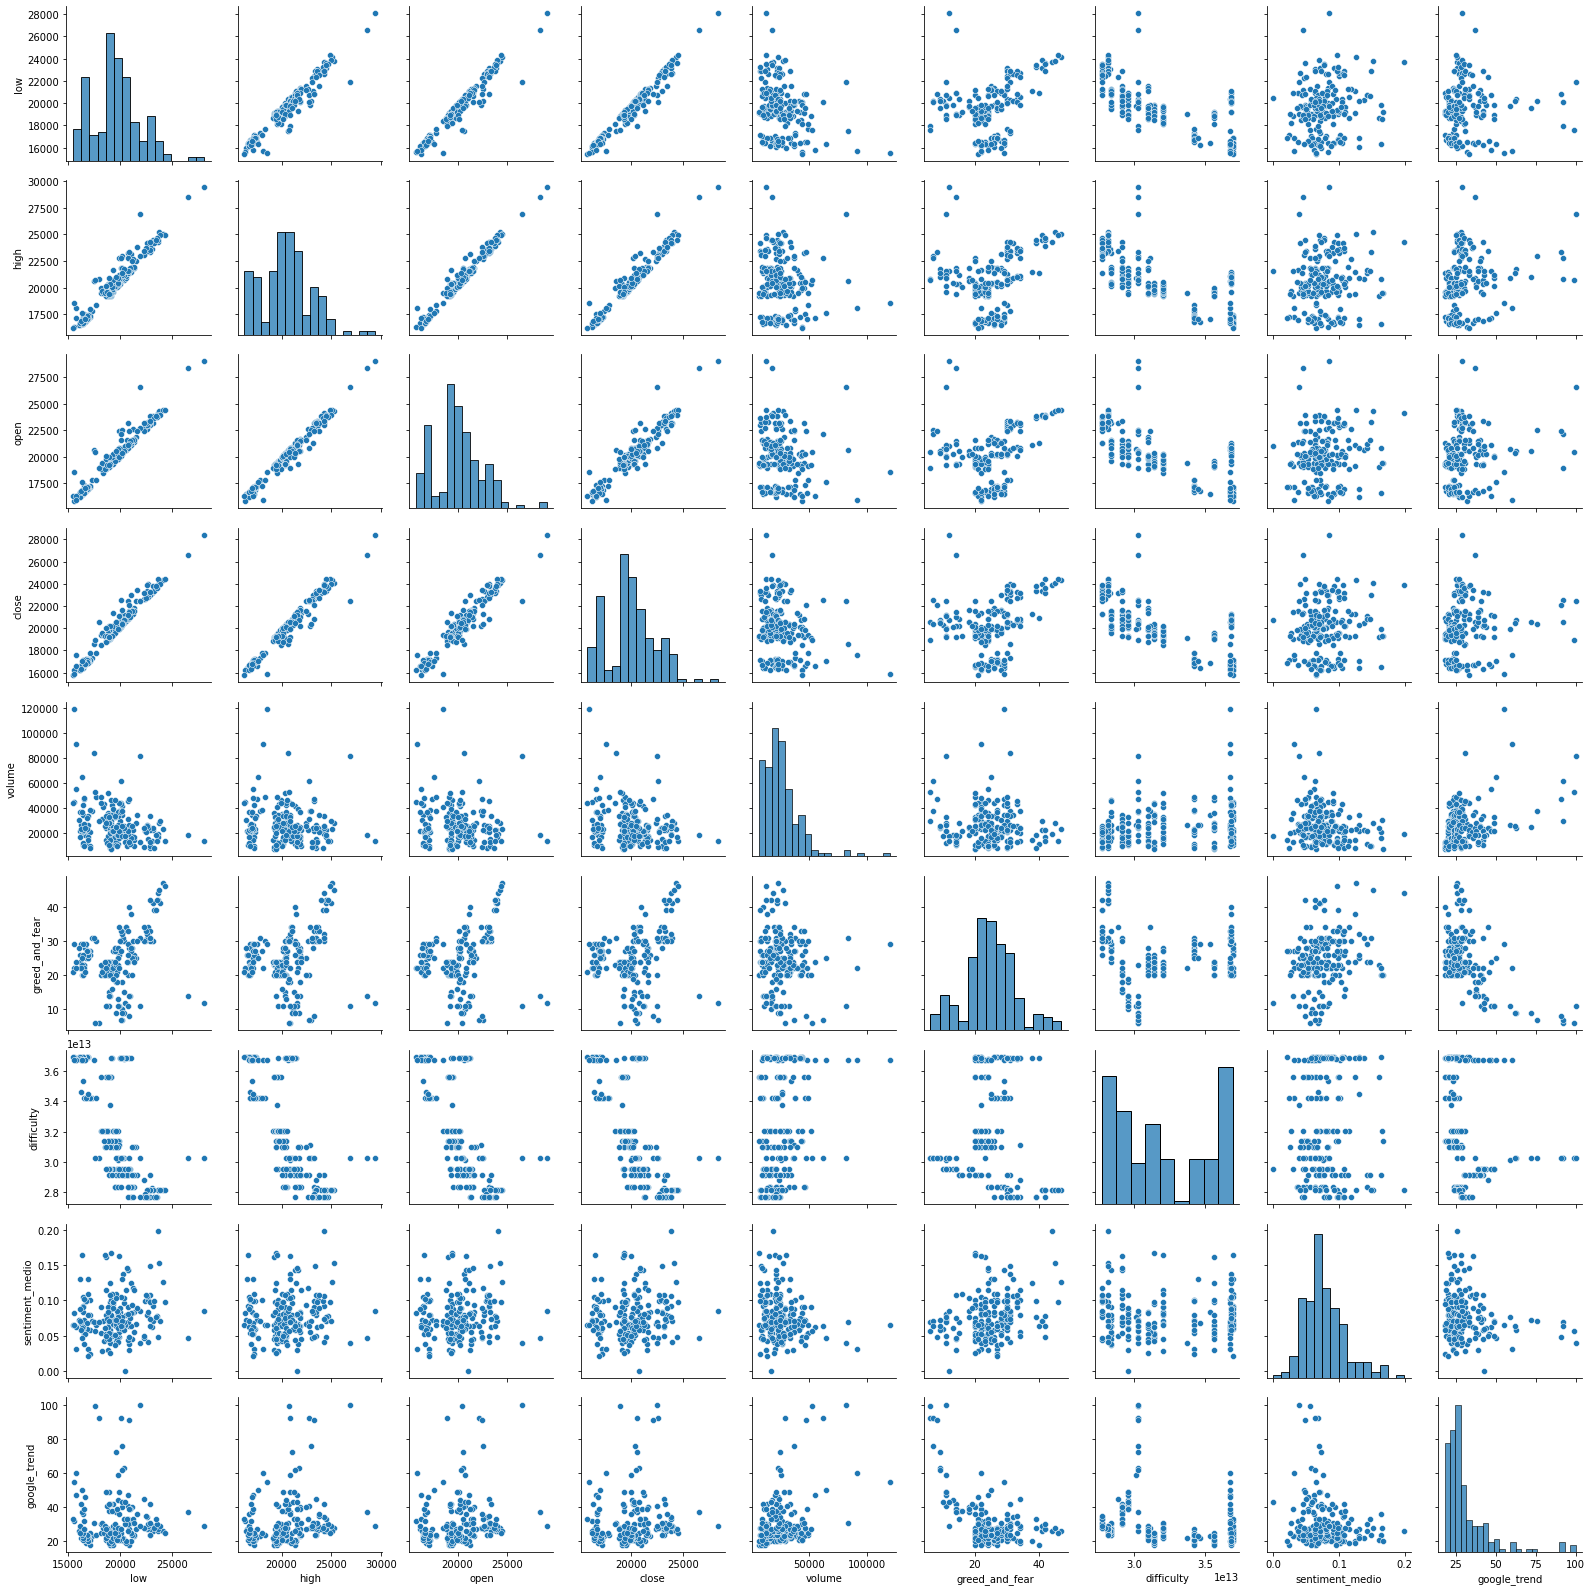

In [11]:
sns.pairplot(df);

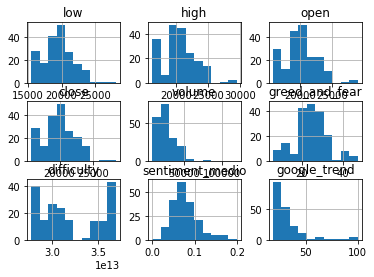

In [12]:
df.hist();

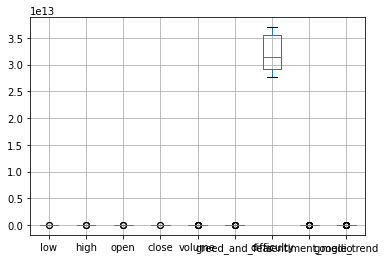

In [13]:
df.boxplot();

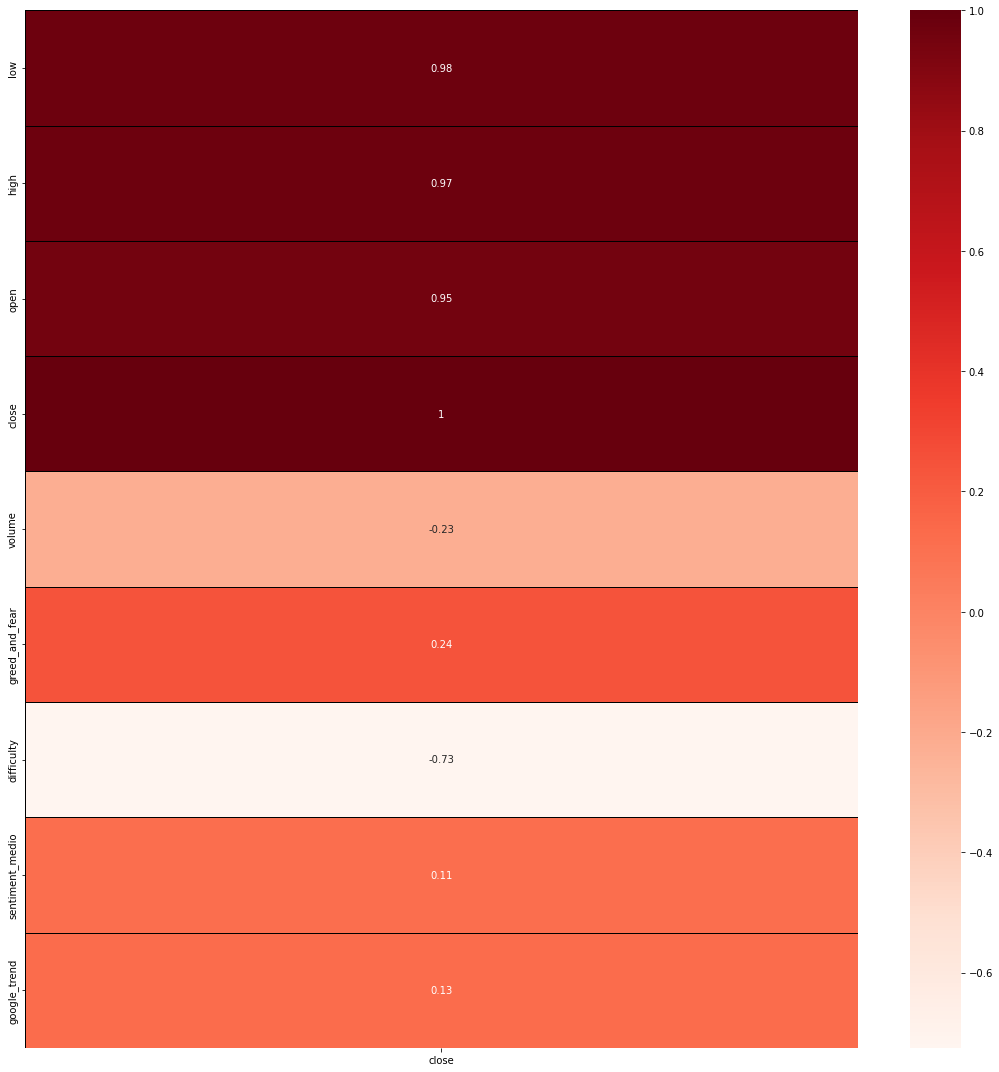

In [14]:
df_corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr[["close"]], cmap="Reds", annot=True, linewidths=0.5,linecolor="Black")
plt.tight_layout()
plt.show()

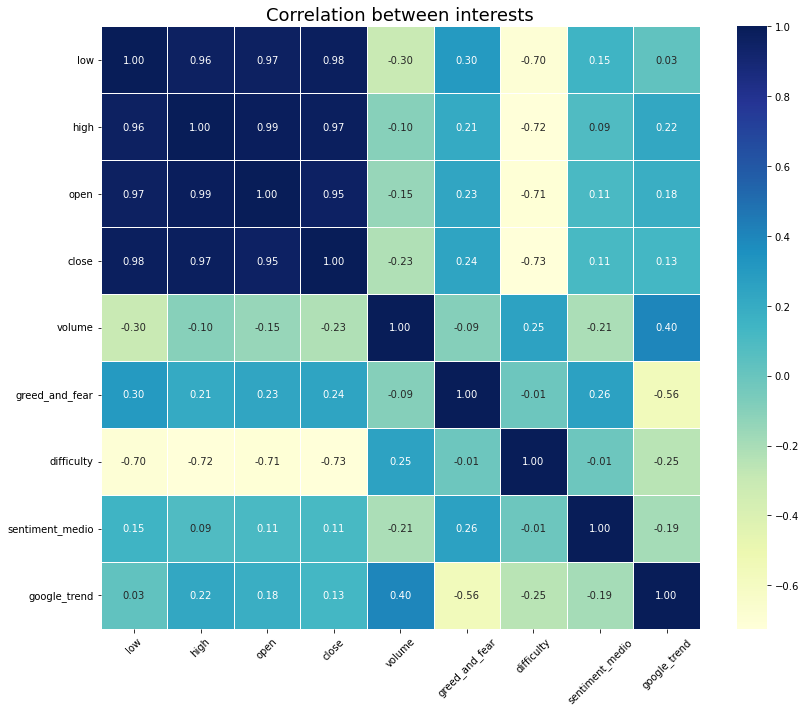

In [15]:
corr = df.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=0.5, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)
plt.tight_layout()
plt.show()